# Frame the Problem and Look at the Big Picture
### What is the objective?
The objective of this is to be able to accurately predict the SalePrice of a house.
### How will this solution be used?
The solution can be used as an analyzer for investments. Say a new house comes on the market and you want to know if the house is a good investment or not. You can use this solution to see if the house is being sold above or below market value and that can determine the quality of investment.
### How should this problem be framed?
This is a type of Multiple Linear Regression problem.
### How will performance be measured?
Performance will be measured by training a multitude of regression models and basing the accuracy of those
against the testing dataset.
### What is the minimum performance needed to reach the business objective?
The minimum will be set at a 15% error rate.
### Can human expertise be of use?
Human expertise can be used once the model has been trained. A experience realtor can come in and see if the 
predictions made by the model are accurate to what reality is.

# The data for this dataset will be from a kaggle dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
pd.set_option('max_columns', None)

In [2]:
df=pd.read_csv("./train.csv")
df_test=pd.read_csv("./test.csv")
df=df.drop(1459)

# Exploring the data

### Since the data is already split between a train set and a test set I do not need to split the training set as to avoid data snooping

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Since the dimnesionaity of the dataset is a large pd.info() will be useful for looking at the columns all at once

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1200 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### 3 columns are of float, 35 columns are of int, and 43 columns are of object
### Looking at the numerical and categroical(object) attributes

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1459.000000,1459.000000,1200.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1451.00000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1378.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,730.000000,56.922550,70.045833,10517.225497,6.100069,5.575051,1971.272104,1984.879369,103.75672,443.374914,46.382454,567.535984,1057.293352,1162.562714,347.230295,5.848526,1515.641535,0.424949,0.057574,1.565456,0.382454,2.866347,1.046607,6.518163,0.613434,1978.515965,1.767649,473.115147,93.804661,46.645648,21.969157,3.411926,15.071282,2.760795,43.518849,6.322138,2007.815627,180944.102810
std,421.321334,42.304033,24.294456,9984.675721,1.383171,1.113125,30.212814,20.645927,181.10815,456.142186,161.248500,441.874057,438.824912,386.712553,436.583480,48.639512,525.616607,0.518870,0.238830,0.550906,0.502798,0.816050,0.220410,1.625894,0.644687,24.696004,0.747301,213.815884,124.249421,66.276387,61.137400,29.327247,55.775138,40.191018,496.291826,2.704540,1.328542,79464.918335
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.00000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.500000,20.000000,59.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,0.00000,0.000000,0.000000,223.500000,795.500000,882.000000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000
50%,730.000000,50.000000,69.000000,9477.000000,6.000000,5.000000,1973.000000,1994.000000,0.00000,383.000000,0.000000,479.000000,991.000000,1086.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1094.500000,70.000000,80.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,166.00000,712.000000,0.000000,808.000000,1298.500000,1391.500000,728.000000,0.000000,1777.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1459.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.00000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
for i in df.select_dtypes('object'):
    print(df[i].value_counts())

RL         1150
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1453
Grvl       6
Name: Street, dtype: int64
Grvl    50
Pave    41
Name: Alley, dtype: int64
Reg    924
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1310
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1458
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1051
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1381
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards     99
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype:

### Number of missing values for each column in the dataset

In [7]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

### Identify the target attribute

In [8]:
df['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
Name: SalePrice, Length: 1459, dtype: int64

### Data visualization for analysis and outliers would normaly be done here. However, given the dimensionality of this dataset, we will perform these two tasks after dimensionality reduction

# Preparing the data
### Getting rid of columns with a ration of above 25% null values

In [9]:
def dropNAN(columns,df):
    for i in columns:
        if (df[i].isnull().sum()/df.shape[0])>.25:
            df=df.drop(i,axis=1)
    return df
df=dropNAN(df.columns.tolist(),df)
df_test=dropNAN(df_test.columns.tolist(), df_test)

In [10]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 76, dtype: int64

### Dimensionality was reduced from 81 to 77

### Transforming categorical(non-numbers) data into numeric and turning NaN into numeric values

In [11]:
from fancyimpute import KNN
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()
impute=KNN()
def encode(data):
    nonulls=np.array(data.dropna())
    impute_reshape=nonulls.reshape(-1,1)
    impute_ordinal=encoder.fit_transform(impute_reshape)
    data.loc[data.notnull()]=np.squeeze(impute_ordinal)
    return data
mylist = list(df.select_dtypes(include=['object']).columns)
for i in mylist:
    encode(df[i])

/home/bradenlockwood/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/bradenlockwood/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/bradenlockwood/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [12]:
df_temp=pd.DataFrame(np.round(impute.fit_transform(df)),columns=df.columns)
df=df_temp

Imputing row 1/1459 with 0 missing, elapsed time: 1.143
Imputing row 101/1459 with 1 missing, elapsed time: 1.146
Imputing row 201/1459 with 0 missing, elapsed time: 1.148
Imputing row 301/1459 with 0 missing, elapsed time: 1.150
Imputing row 401/1459 with 0 missing, elapsed time: 1.152
Imputing row 501/1459 with 0 missing, elapsed time: 1.153
Imputing row 601/1459 with 0 missing, elapsed time: 1.155
Imputing row 701/1459 with 0 missing, elapsed time: 1.157
Imputing row 801/1459 with 0 missing, elapsed time: 1.159
Imputing row 901/1459 with 1 missing, elapsed time: 1.161
Imputing row 1001/1459 with 5 missing, elapsed time: 1.163
Imputing row 1101/1459 with 0 missing, elapsed time: 1.166
Imputing row 1201/1459 with 0 missing, elapsed time: 1.167
Imputing row 1301/1459 with 1 missing, elapsed time: 1.169
Imputing row 1401/1459 with 0 missing, elapsed time: 1.171


In [13]:
mylist = list(df_test.select_dtypes(include=['object']).columns)
for i in mylist:
    encode(df_test[i])

/home/bradenlockwood/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/bradenlockwood/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/bradenlockwood/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

/home/bradenlockwood/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [14]:
df_temp=pd.DataFrame(np.round(impute.fit_transform(df_test)),columns=df_test.columns)
df_test=df_temp

Imputing row 1/1459 with 0 missing, elapsed time: 1.047
Imputing row 101/1459 with 5 missing, elapsed time: 1.049
Imputing row 201/1459 with 0 missing, elapsed time: 1.051
Imputing row 301/1459 with 0 missing, elapsed time: 1.052
Imputing row 401/1459 with 5 missing, elapsed time: 1.055
Imputing row 501/1459 with 0 missing, elapsed time: 1.056
Imputing row 601/1459 with 0 missing, elapsed time: 1.058
Imputing row 701/1459 with 0 missing, elapsed time: 1.060
Imputing row 801/1459 with 0 missing, elapsed time: 1.063
Imputing row 901/1459 with 0 missing, elapsed time: 1.064
Imputing row 1001/1459 with 0 missing, elapsed time: 1.066
Imputing row 1101/1459 with 0 missing, elapsed time: 1.068
Imputing row 1201/1459 with 0 missing, elapsed time: 1.070
Imputing row 1301/1459 with 0 missing, elapsed time: 1.071
Imputing row 1401/1459 with 0 missing, elapsed time: 1.073


### This process uses OridnalEncoder which turns categorical features into integers. We then use a library called FancyImpute which uses machine learning to impute missing values using K-Nearest Neighbor

In [15]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

### Before we start Feature Selection we will normalize the data, making every value between 0 and 1, so that are machine learning models will work better

In [16]:
from sklearn.preprocessing import StandardScaler
x=df.drop('SalePrice', axis=1)
x=StandardScaler().fit_transform(x)
y=df['SalePrice']
x=pd.DataFrame(x)

In [17]:
x_test=df_test
x_test=StandardScaler().fit_transform(x_test)
x_test=pd.DataFrame(x_test)

### After normilization the column names change into numeric values, we will change them back into the original names

In [18]:
def rename_columns(length,columns,df):
    a=list(length)
    b=list(columns)
    dic=dict(zip(a,b))
    df.rename(columns=dic, inplace=True)
rename_columns(range(0,len(x.columns)), df.columns, x)

In [19]:
def rename_columns(length,columns,df):
    a=list(length)
    b=list(columns)
    dic=dict(zip(a,b))
    df.rename(columns=dic, inplace=True)
rename_columns(range(0,len(x_test.columns)), df_test.columns, x_test)

### Feature Selection

#### Low Variance Filter

#### This feature selection technique is used to filter out columns with a low varience. For example, if a column only has data of either 0 or 1 this would be defined as low variance and would be filtered out

In [20]:
from sklearn.feature_selection import VarianceThreshold
from numpy import arange
thresholds = arange(0.0, 1.05, 0.05)
for i in thresholds:
    transform=VarianceThreshold(threshold=i)
    x_sel_var=transform.fit_transform(x)
    features=x_sel_var.shape[1]
    print('Threshold=%.2f, Features=%d' % (i, features))

Threshold=0.00, Features=75
Threshold=0.05, Features=75
Threshold=0.10, Features=75
Threshold=0.15, Features=75
Threshold=0.20, Features=75
Threshold=0.25, Features=75
Threshold=0.30, Features=75
Threshold=0.35, Features=75
Threshold=0.40, Features=75
Threshold=0.45, Features=75
Threshold=0.50, Features=75
Threshold=0.55, Features=75
Threshold=0.60, Features=75
Threshold=0.65, Features=75
Threshold=0.70, Features=75
Threshold=0.75, Features=75
Threshold=0.80, Features=75
Threshold=0.85, Features=75
Threshold=0.90, Features=75
Threshold=0.95, Features=75
Threshold=1.00, Features=37


#### The only time that features are slected is when the variance is at 1 which is a high variance. Since there is not features with low variance we will not perform a Low Variance Filter on our dataset

#### SelectKBest 

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
def select_features(x_train, y_train, x_test):
    fs=SelectKBest(score_func=f_regression, k='all')
    fs.fit(x_train, y_train)
    x_train_fs=fs.transform(x_train)
    x_test_fs=fs.transform(x_test)
    return x_train_fs, x_test_fs, fs
x_train_fs, x_test_fs, fs= select_features(x,y,x_test)
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.670102
Feature 1: 10.493908
Feature 2: 41.746283
Feature 3: 202.665204
Feature 4: 109.015140
Feature 5: 2.460133
Feature 6: 101.694778
Feature 7: 0.352186
Feature 8: 0.298951
Feature 9: 6.616169
Feature 10: 3.813167
Feature 11: 67.665805
Feature 12: 12.206647
Feature 13: 0.082049
Feature 14: 10.785049
Feature 15: 48.807135
Feature 16: 2434.935571
Feature 17: 8.862228
Feature 18: 548.230569
Feature 19: 504.138792
Feature 20: 75.740770
Feature 21: 25.978821
Feature 22: 15.707715
Feature 23: 15.767961
Feature 24: 0.263339
Feature 25: 438.551936
Feature 26: 996.376095
Feature 27: 20.369225
Feature 28: 249.522620
Feature 29: 866.756543
Feature 30: 6.589534
Feature 31: 134.059630
Feature 32: 7.770867
Feature 33: 256.313412
Feature 34: 2.133622
Feature 35: 0.174779
Feature 36: 70.119423
Feature 37: 880.708349
Feature 38: 14.378501
Feature 39: 277.746752
Feature 40: 98.319175
Feature 41: 85.207405
Feature 42: 845.467367
Feature 43: 165.285162
Feature 44: 0.958663
Feature 45: 1469.

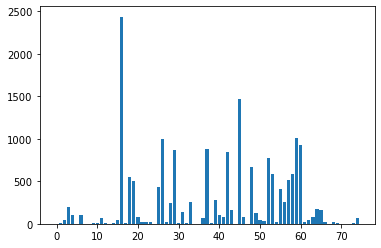

In [22]:
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

#### Let us extract only the columns where the SelectKBest score is above 500

In [23]:
keys=list()
for i in range(len(fs.scores_)):
    if fs.scores_[i]>500:
        keys.append(i)
keys=[x+1 for x in keys]

In [24]:
temp=1
columns=list()
for i in list(x):
    if temp in keys:
        columns.append(i)
    temp=temp+1

In [25]:
x=x.filter(columns, axis=1)
X_test=x_test.filter(columns, axis=1)
visualization_df=df.filter(columns, axis=1)
visualization_df['SalePrice']=df['SalePrice']

#### We now have the new dataframe x where each of the columns had a score of above 500
#### We also created a new dataframe, visualization_df, which is exactly like the dataframe x except not not normalized

# Visualizing the data
### To start off visaulzing the data we will show the correlations between the data and the target variable

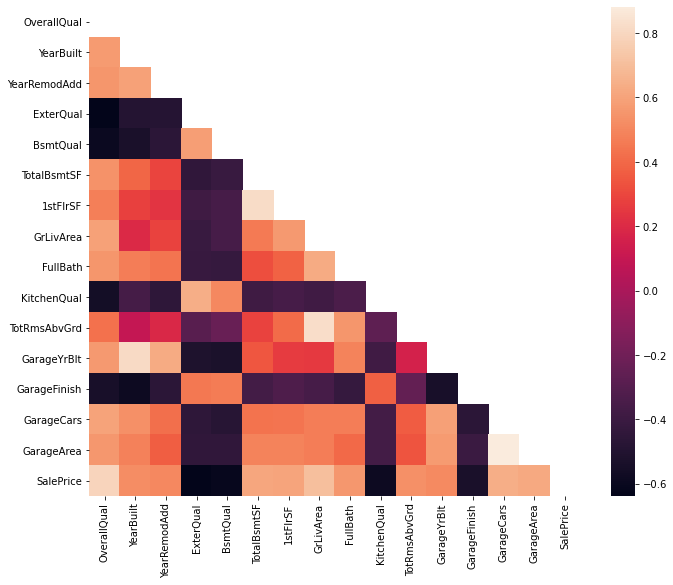

In [26]:
x['SalePrice']=df['SalePrice']
corr_matrix=x.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)
fig, ax=plt.subplots(figsize=(11,9))
mask=np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr_matrix, mask=mask, annot=False)
plt.show()

#### Looking at the bottom row we can see the correlation between the SalePrice and each of the columns in our dataframe. We can see that OverallQuality and GrLivArea have a big positive correlation and we can see that ExterQual, BsmtQual, KitchenQual and GarageFinish have a big negative correlation

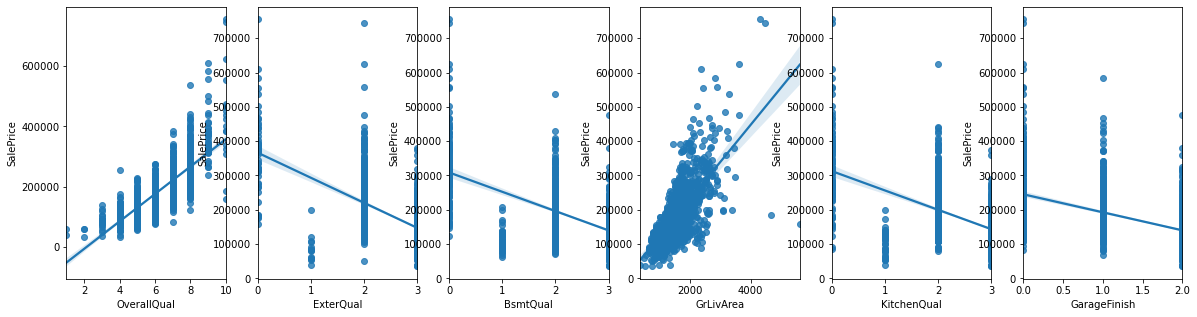

In [27]:
heatmap_columns=['OverallQual','ExterQual','BsmtQual','GrLivArea','KitchenQual','GarageFinish']
fig, axs=plt.subplots(ncols=6, figsize=(20,5))
temp=0
for i in heatmap_columns:
    sns.regplot(data= visualization_df, x=i, y='SalePrice', ax=axs[temp])
    temp=temp+1

#### These 6 graphs line up with the correlation figure above. OverallQual and GrLivArea both have a positive correlation while ExterQual, BsmtQual, KitchenQual, and GarageFinish all have a negative correlation

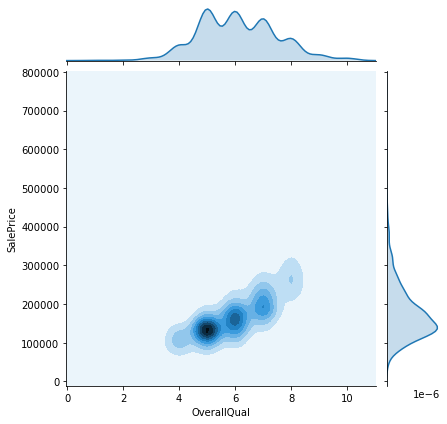

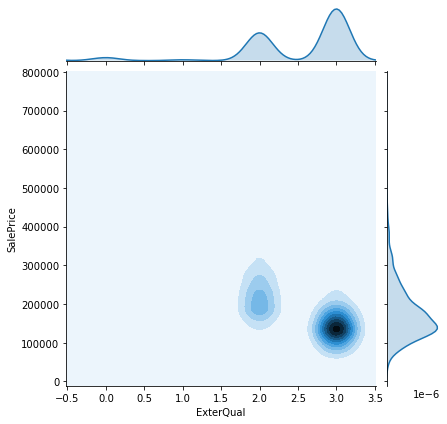

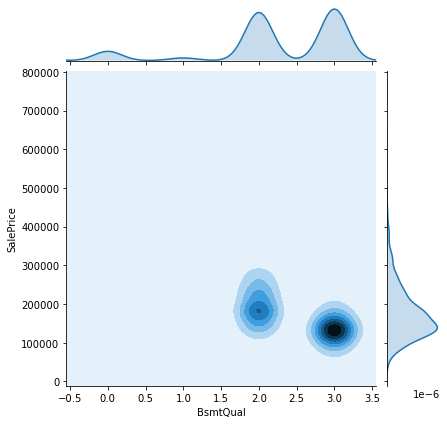

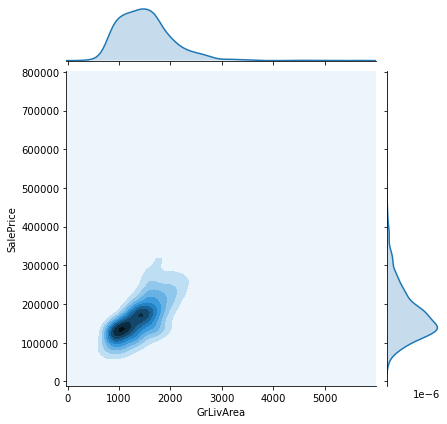

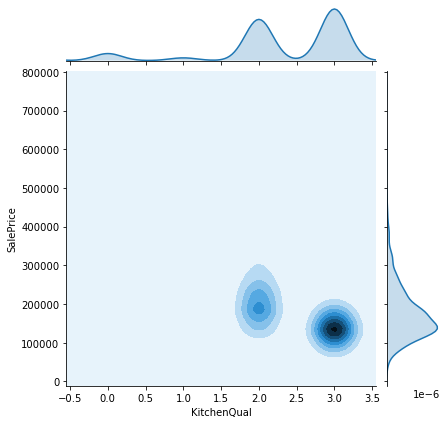

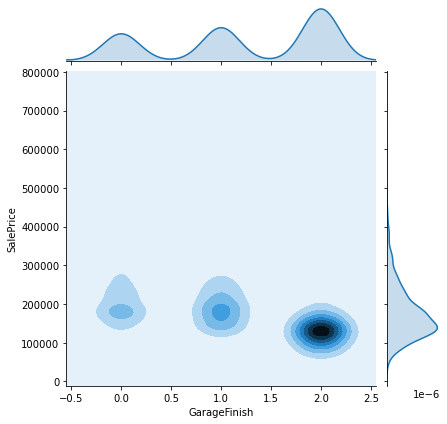

In [28]:
for i in heatmap_columns:
    sns.jointplot(data= visualization_df, x=i, y='SalePrice', kind='kde')

#### Here we use a density map to see where most of the values are in comparison to the target value. For example, KitchenQual has most of its values located at a KitchenQual of 3.0 and a SalePrice of $125,000

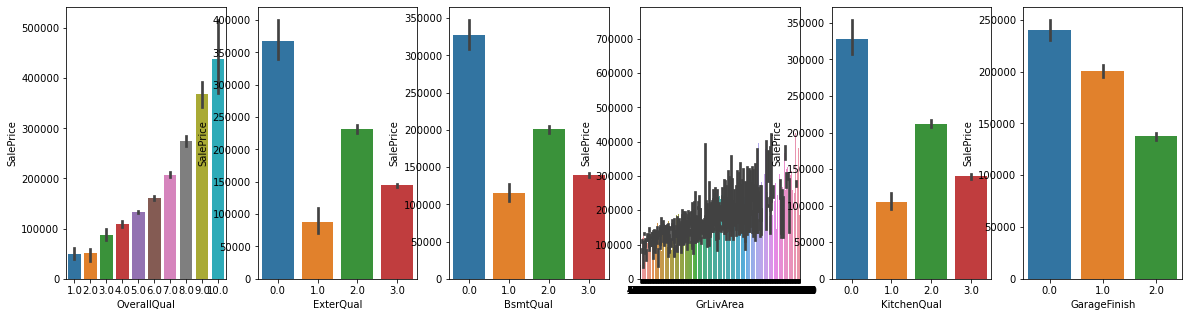

In [29]:
fig, axs=plt.subplots(ncols=6, figsize=(20,5))
temp=0
for i in heatmap_columns:
    sns.barplot(data= visualization_df, x=i, y='SalePrice', ax=axs[temp])
    temp=temp+1

#### Again we see that OverallQual and GrLivArea have a positive correlation while ExterQual, BsmtQual, KitchenQual, and GarageFinish all have a negative correlation

# Feature Extraction
### Now we will use PCA to extract the final features that we will use for our machine learning models

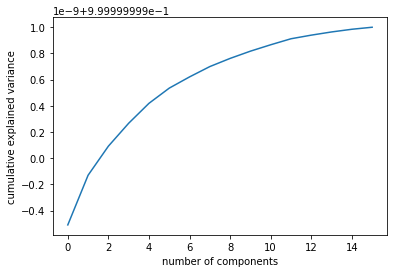

In [30]:
from sklearn.decomposition import PCA
pca=PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

#### This is a graph of the variance retained related to the number of components.
#### Now we can use PCA to keep the columns so that 92% variance is retained which is about 10 columns

In [31]:
x=x.drop('SalePrice', axis=1)

In [32]:
pca = PCA(10)
x_train = pca.fit_transform(x)
x_test = pca.fit_transform(X_test)

# Training Machine Learning models
### Here we will look at a multitude of models and pick the one that gives us the best accruacy

### Here is a function that will quickly let us use multiple machine learning models and compare there scores

In [33]:
>>> from sklearn.model_selection import cross_val_score
def model(algo, X_train, y_train, cv):
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    scores=round(cross_val_score(model, X_train, y_train, cv=cv).mean()*100)
    
    return acc, scores

### Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
accuracy, accuracy_cv=model(LinearRegression(), x_train, y, 10)
print('Accuracy: %s' % accuracy)
print('Accuracy CV-10 Fold: %s' % accuracy_cv)

Accuracy: 79.01
Accuracy CV-10 Fold: 79.0


### K Nearest Neighbor

In [35]:
from sklearn.neighbors import KNeighborsRegressor
accuracy, accuracy_cv=model(KNeighborsRegressor(), x_train, y, 10)
print('Accuracy: %s' % accuracy)
print('Accuracy CV-10 Fold: %s' % accuracy_cv)

Accuracy: 87.07
Accuracy CV-10 Fold: 80.0


### Random Forest Regressor

In [36]:
from sklearn.ensemble import RandomForestRegressor
accuracy, accuracy_cv=model(RandomForestRegressor(), x_train, y, 10)
print('Accuracy: %s' % accuracy)
print('Accuracy CV-10 Fold: %s' % accuracy_cv)

Accuracy: 97.7
Accuracy CV-10 Fold: 83.0


### Gradient Boost Trees

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
accuracy, accuracy_cv=model(GradientBoostingRegressor(), x_train, y, 10)
print('Accuracy: %s' % accuracy)
print('Accuracy CV-10 Fold: %s' % accuracy_cv)

Accuracy: 93.41
Accuracy CV-10 Fold: 83.0


### From seeing the results it looks like Random Forest Regressor came out on top with an accuracy of 97.49% and a CV-10 Fold of 83.0%. Moving forward, the Random Forest Regressor would be the model to use on predicting the SalePrices of future houses

In [38]:
forest=RandomForestRegressor().fit(x_train, y)
y_test=forest.predict(x_test)

### Since this notebook was also used for a kaggle competition we submit the predicts via a csv file

In [ ]:
df_test["Id"]=df_test['Id'].astype('int')

In [ ]:
sub = pd.DataFrame({'Id':df_test['Id'].values, 'SalePrice':y_test})

In [ ]:
sub.to_csv('./submission.csv', index = False)